In [169]:
import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib.pyplot as plt
#Below styling methods come in handy for visualization tasks
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8,8

In [170]:
tcs = pd.read_csv('dataset/tcs_data.csv')
infy = pd.read_csv('dataset/infy_data.csv')
nifty = pd.read_csv('dataset/nifty_data.csv')
tcs.name='TCS'
infy.name='infy'
nifty.name='nifty'
stocks = [tcs, infy, nifty]

In [171]:
def date_to_feature(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.weekofyear

In [172]:
for i in range(len(stocks)):
    date_to_feature(stocks[i])    

In [173]:
infy.head()

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
0,2015-01-01,1968.95,1982.00,1956.9,1974.40,500691,9.870306e+13,2015,1,1,1
1,2015-01-02,1972.00,2019.05,1972.0,2013.20,1694580,3.394669e+14,2015,1,2,1
2,2015-01-05,2009.90,2030.00,1977.5,1995.90,2484256,4.979911e+14,2015,1,5,2
3,2015-01-06,1980.00,1985.00,1934.1,1954.20,2416829,4.724458e+14,2015,1,6,2
4,2015-01-07,1965.00,1974.75,1950.0,1963.55,1812479,3.557162e+14,2015,1,7,2


In [174]:
# For simplicity, associate the dates as the indices, not integers
def indexing(stock):
    stock.index = stock['Date']
    stock.index = pd.to_datetime(stock.index, unit='s')
for stock in stocks:
    indexing(stock)

In [175]:
infy.head()

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-01-01,2015-01-01,1968.95,1982.00,1956.9,1974.40,500691,9.870306e+13,2015,1,1,1
2015-01-02,2015-01-02,1972.00,2019.05,1972.0,2013.20,1694580,3.394669e+14,2015,1,2,1
2015-01-05,2015-01-05,2009.90,2030.00,1977.5,1995.90,2484256,4.979911e+14,2015,1,5,2
2015-01-06,2015-01-06,1980.00,1985.00,1934.1,1954.20,2416829,4.724458e+14,2015,1,6,2
2015-01-07,2015-01-07,1965.00,1974.75,1950.0,1963.55,1812479,3.557162e+14,2015,1,7,2


Date
2015-01-01    1974.40
2015-01-02    2013.20
2015-01-05    1995.90
2015-01-06    1954.20
2015-01-07    1963.55
2015-01-08    1973.45
2015-01-09    2074.45
2015-01-12    2115.95
2015-01-13    2088.90
2015-01-14    2128.65
2015-01-15    2134.25
2015-01-16    2118.30
2015-01-19    2102.50
2015-01-20    2124.20
2015-01-21    2169.90
2015-01-22    2196.45
2015-01-23    2215.05
2015-01-27    2136.50
2015-01-28    2144.55
2015-01-29    2145.50
2015-01-30    2141.90
2015-02-02    2136.85
2015-02-03    2120.90
2015-02-04    2142.85
2015-02-05    2193.80
2015-02-06    2230.50
2015-02-09    2248.90
2015-02-10    2278.30
2015-02-11    2284.85
2015-02-12    2311.20
               ...   
2015-11-18    1020.00
2015-11-19    1047.80
2015-11-20    1052.40
2015-11-23    1053.70
2015-11-24    1041.15
2015-11-26    1052.40
2015-11-27    1066.35
2015-11-30    1087.90
2015-12-01    1079.00
2015-12-02    1060.70
2015-12-03    1057.75
2015-12-04    1049.05
2015-12-07    1046.25
2015-12-08    1044.40
2015-

In [195]:
#Set default values for weekly moving averages
dummy2 = pd.DataFrame()
def plot_time_series(stock, weeks = [4, 16, 28, 40, 52]):
    
    dummy = pd.DataFrame()
    # Resampling our data into weeks format for calculation
    
    dummy['Close'] = stock['Close'].resample('W').mean() 
     
    for i in range(len(weeks)):
        # Simple moving average
        m_a = dummy['Close'].rolling(weeks[i]).mean() 
        dummy[" MA for " + str(weeks[i])+ " weeks"] = m_a
        print('Calculated Moving averages: for {} weeks :' .format(weeks[i]))
        print('\nminimum : {0:.2f} | maximum : {1:.2f}\n\n' .format(min(dummy['Close']),max(dummy['Close'])))
    dummy.plot(title="Moving Averages for {} \n\n" .format(stock.name))
    return dummy

Calculated Moving averages: for 4 weeks :

minimum : 2354.19 | maximum : 2721.96


Calculated Moving averages: for 16 weeks :

minimum : 2354.19 | maximum : 2721.96


Calculated Moving averages: for 28 weeks :

minimum : 2354.19 | maximum : 2721.96


Calculated Moving averages: for 40 weeks :

minimum : 2354.19 | maximum : 2721.96


Calculated Moving averages: for 52 weeks :

minimum : 2354.19 | maximum : 2721.96




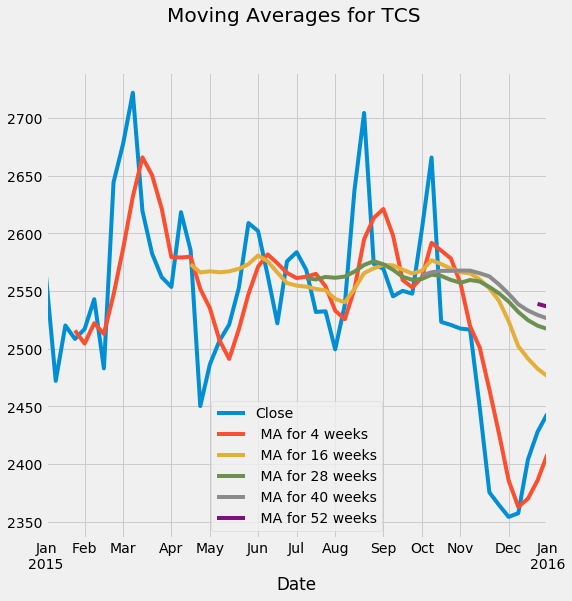

In [178]:
tcs_dummy = plot_time_series(tcs)

Calculated Moving averages: for 4 weeks :

minimum : 11000.44 | maximum : 12728.92


Calculated Moving averages: for 16 weeks :

minimum : 11000.44 | maximum : 12728.92


Calculated Moving averages: for 28 weeks :

minimum : 11000.44 | maximum : 12728.92


Calculated Moving averages: for 40 weeks :

minimum : 11000.44 | maximum : 12728.92


Calculated Moving averages: for 52 weeks :

minimum : 11000.44 | maximum : 12728.92




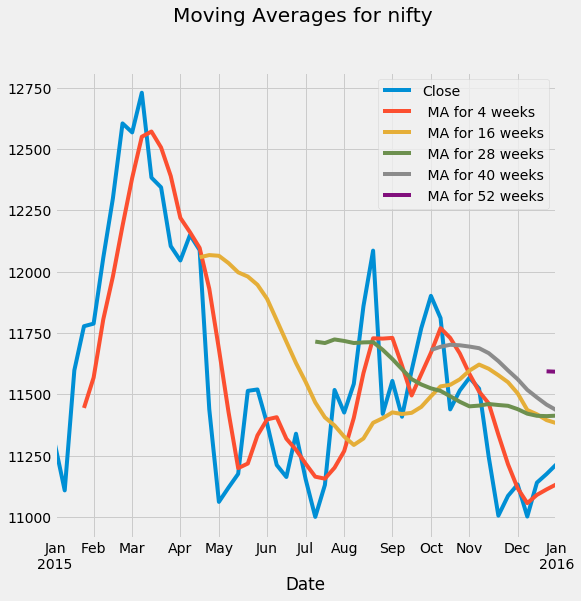

In [179]:
nifty_dummy = plot_time_series(nifty)

Calculated Moving averages: for 4 weeks :

minimum : 959.36 | maximum : 2295.76


Calculated Moving averages: for 16 weeks :

minimum : 959.36 | maximum : 2295.76


Calculated Moving averages: for 28 weeks :

minimum : 959.36 | maximum : 2295.76


Calculated Moving averages: for 40 weeks :

minimum : 959.36 | maximum : 2295.76


Calculated Moving averages: for 52 weeks :

minimum : 959.36 | maximum : 2295.76




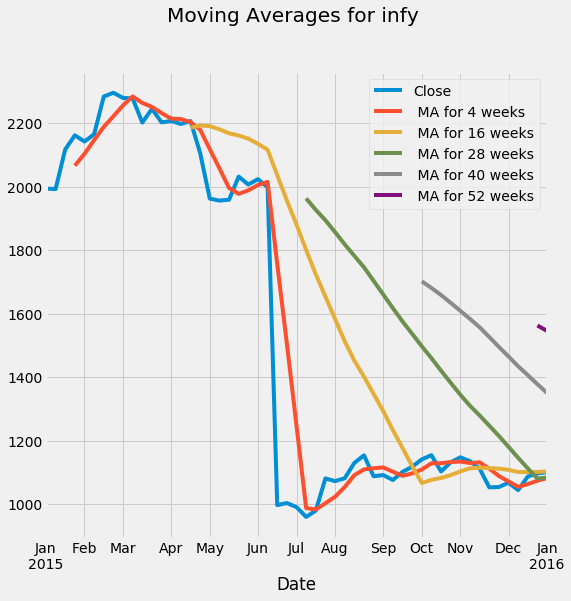

In [180]:
infy_dummy = plot_time_series(infy)

In [117]:
# The plot is not so well layed out for larger moving average size : 
tcs_dummy.head()

,Close,MA for 4 weeks,MA for 16 weeks,MA for 28 weeks,MA for 40 weeks,MA for 52 weeks
Date,,,,,,
2015-01-04,2562.5000,NaN,NaN,NaN,NaN,NaN
2015-01-11,2472.1300,NaN,NaN,NaN,NaN,NaN
2015-01-18,2520.1600,NaN,NaN,NaN,NaN,NaN
2015-01-25,2508.4800,2515.817500,NaN,NaN,NaN,NaN
2015-02-01,2517.0875,2504.464375,NaN,NaN,NaN,NaN


### This result is obvious as the sliding window is outside the scope for the first p weeks, where p is the MA(p) process




## Now we have to account for the fact that the market remains closed on weekends.

###### Instead of resample(), we will here use resample.Resampler.asfreq() function. Because it also provide us option of padding (backwardfill/forwardfill missing values "not NANs" ). We are using this, because on saturdays and sundays, market remains closed, so friday's close price could be forwarded in closing days.

In [197]:
# To account for weekends, pad fills with previous known value  
tcs = tcs.asfreq('D', method ='pad')
infy = infy.asfreq('D', method ='pad')
nifty = nifty.asfreq('D', method ='pad')

In [201]:
tcs.head()

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-01-01,2015-01-01,2567.0,2567.00,2541.00,2545.55,183415,4.674345e+13,2015,1,1,1
2015-01-02,2015-01-02,2551.0,2590.95,2550.60,2579.45,462870,1.188740e+14,2015,1,2,1
2015-01-03,2015-01-02,2551.0,2590.95,2550.60,2579.45,462870,1.188740e+14,2015,1,2,1
2015-01-04,2015-01-02,2551.0,2590.95,2550.60,2579.45,462870,1.188740e+14,2015,1,2,1
2015-01-05,2015-01-05,2581.0,2599.90,2524.65,2540.25,877121,2.248886e+14,2015,1,5,2


In [206]:
tcs.name='TCS'
infy.name='INFY'
nifty.name='NIFTY'

In [207]:
def plot_roll_win(stock, win = [10, 75]):
    
    dummy = pd.DataFrame()
    
    dummy['Close'] = stock['Close']
     
    for i in range(len(win)):
        m_a = dummy['Close'].rolling(win[i]).mean() # M.A using predefined function
        dummy[" Mov.AVG for " + str(win[i])+ " Roll Window"] = m_a
        print('Calculated Moving averages: for {} weeks :' .format(win[i]))
        print('\nminimum : {0:.2f} | maximum : {1:.2f}\n\n' .format(min(dummy['Close']),max(dummy['Close'])))
    dummy.plot(title="Moving Averages for {} \n\n" .format(stock.name))


Calculated Moving averages: for 10 weeks :

minimum : 2319.80 | maximum : 2776.00


Calculated Moving averages: for 75 weeks :

minimum : 2319.80 | maximum : 2776.00




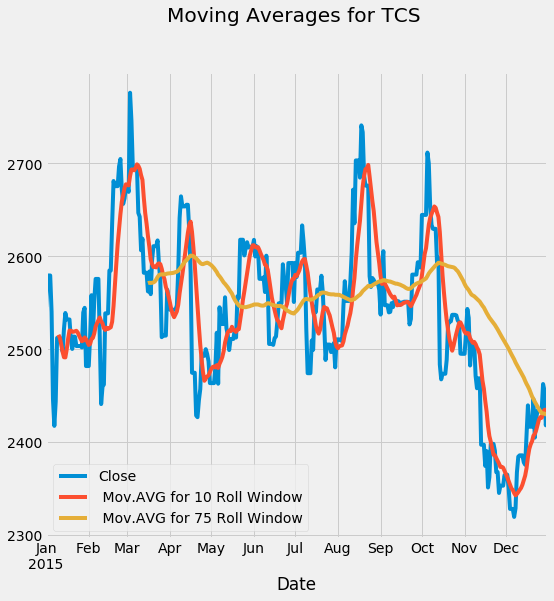

In [208]:
plot_roll_win(tcs)

Calculated Moving averages: for 10 weeks :

minimum : 937.50 | maximum : 2324.70


Calculated Moving averages: for 75 weeks :

minimum : 937.50 | maximum : 2324.70




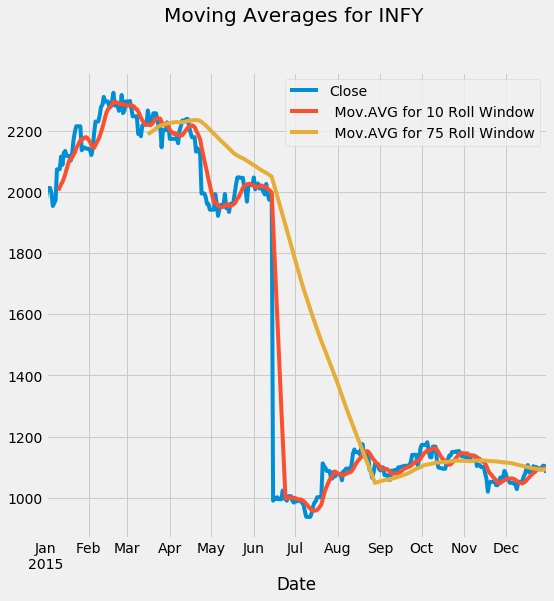

In [209]:
plot_roll_win(infy)

Calculated Moving averages: for 10 weeks :

minimum : 10798.25 | maximum : 12855.90


Calculated Moving averages: for 75 weeks :

minimum : 10798.25 | maximum : 12855.90




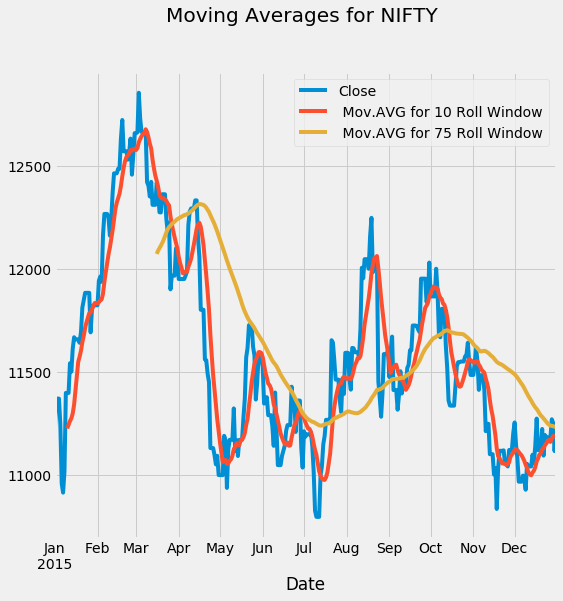

In [210]:
plot_roll_win(nifty)

### Conclusion
From Above graph plottings we can infer that (*unsurprisingly*) as much as the rolling window is small, the moving average better portrays the actual data

## Creating dummy time series : Volume Shocks

In [215]:
def volume_shocks(stock):
    #Time shift of one, a row in this context
    stock["vol_(t+1)"] = stock.Volume.shift(1)  
    
    stock["volume_shock"] = ((abs(stock["vol_(t+1)"] - stock["Volume"])/stock["Volume"]*100)  > 10).astype(int)
    
    return stock

In [227]:
volume_shocks(tcs).head()

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_(t+1),volume_shock
Date,,,,,,,,,,,,,
2015-01-01,2015-01-01,2567.0,2567.00,2541.00,2545.55,183415,4.674345e+13,2015,1,1,1,NaN,0
2015-01-02,2015-01-02,2551.0,2590.95,2550.60,2579.45,462870,1.188740e+14,2015,1,2,1,183415.0,1
2015-01-03,2015-01-02,2551.0,2590.95,2550.60,2579.45,462870,1.188740e+14,2015,1,2,1,462870.0,0
2015-01-04,2015-01-02,2551.0,2590.95,2550.60,2579.45,462870,1.188740e+14,2015,1,2,1,462870.0,0
2015-01-05,2015-01-05,2581.0,2599.90,2524.65,2540.25,877121,2.248886e+14,2015,1,5,2,462870.0,1


In [224]:
volume_shocks(infy).head()

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_(t+1),volume_shock
Date,,,,,,,,,,,,,
2015-01-01,2015-01-01,1968.95,1982.00,1956.9,1974.4,500691,9.870306e+13,2015,1,1,1,NaN,0
2015-01-02,2015-01-02,1972.00,2019.05,1972.0,2013.2,1694580,3.394669e+14,2015,1,2,1,500691.0,1
2015-01-03,2015-01-02,1972.00,2019.05,1972.0,2013.2,1694580,3.394669e+14,2015,1,2,1,1694580.0,0
2015-01-04,2015-01-02,1972.00,2019.05,1972.0,2013.2,1694580,3.394669e+14,2015,1,2,1,1694580.0,0
2015-01-05,2015-01-05,2009.90,2030.00,1977.5,1995.9,2484256,4.979911e+14,2015,1,5,2,1694580.0,1


In [228]:
volume_shocks(nifty).head()

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_(t+1),volume_shock
Date,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1


## Creating dummy time series :  Volume Shock Direction

In [244]:
def direction_fun(stock):
    if stock["volume_shock"] == 0:
        pass
    else:
        if (stock["vol_(t+1)"] - stock["Volume"]) < 0:
            return 0
        else:
            return 1
def vol_shock_direction(stock):
    stock['VOL_SHOCK_DIR'] = 'Nan'
    stock['VOL_SHOCK_DIR'] = stock.apply(direction_fun, axis=1)
    return stock

In [235]:
vol_shock_direction(tcs).head(3)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_(t+1),volume_shock,VOL_SHOCK_DIR
Date,,,,,,,,,,,,,,
2015-01-01,2015-01-01,2567.0,2567.00,2541.0,2545.55,183415,4.674345e+13,2015,1,1,1,NaN,0,NaN
2015-01-02,2015-01-02,2551.0,2590.95,2550.6,2579.45,462870,1.188740e+14,2015,1,2,1,183415.0,1,0.0
2015-01-03,2015-01-02,2551.0,2590.95,2550.6,2579.45,462870,1.188740e+14,2015,1,2,1,462870.0,0,NaN


In [236]:
vol_shock_direction(infy).head(3)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_(t+1),volume_shock,VOL_SHOCK_DIR
Date,,,,,,,,,,,,,,
2015-01-01,2015-01-01,1968.95,1982.00,1956.9,1974.4,500691,9.870306e+13,2015,1,1,1,NaN,0,NaN
2015-01-02,2015-01-02,1972.00,2019.05,1972.0,2013.2,1694580,3.394669e+14,2015,1,2,1,500691.0,1,0.0
2015-01-03,2015-01-02,1972.00,2019.05,1972.0,2013.2,1694580,3.394669e+14,2015,1,2,1,1694580.0,0,NaN


In [237]:
vol_shock_direction(nifty).head(3)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_(t+1),volume_shock,VOL_SHOCK_DIR
Date,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.7,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.1,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.1,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN


## Creating dummy time series : Price shocks and Pricing black swan

In the given task, both the columns had exact same columns, so i went ahead and did as mentioned

In [242]:
def price_shocks(stock):
    stock["price_t+1"] = stock.Close.shift(1)  #next rows value
    stock["price_shock"] = (abs((stock["price_t+1"] - stock["Close"])/stock["Close"]*100)  > 2).astype(int)
    stock["price_black_swan"] = stock['price_shock'] # Since both had same data anad info/
    return stock

In [248]:
price_shocks(tcs).head(1)
price_shocks(infy).head(0)
price_shocks(nifty).head(1)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_(t+1),volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.8,11235.75,11166.35,11215.7,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN,NaN,0,0


## Creating dummy time series : Price Shock Direction and Black Swan shock direction

In [254]:
def direction_price(stock):
    if stock["price_shock"] == 0:
        pass
    else:
        if (stock["price_t+1"] - stock["Close"]) < 0:
            return 0
        else:
            return 1

In [255]:
def price_and_black_shock_direction(stock):
    stock['PRICE_SHOCK_DIR'] = 'Nan'
    stock['PRICE_SHOCK_DIR'] = stock.apply(direction_price, axis=1)
    stock['BLACK_SWAN_SHOCK_DIR'] = stock['PRICE_SHOCK_DIR'] 
    return stock

In [257]:
price_and_black_shock_direction(tcs)
price_and_black_shock_direction(infy)
price_and_black_shock_direction(nifty).head(10)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_(t+1),volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan,PRICE_SHOCK_DIR,BLACK_SWAN_SHOCK_DIR
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN,NaN,0,0,NaN,NaN
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0,11215.70,0,0,NaN,NaN
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0,NaN,NaN
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0,NaN,NaN
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1,1.0,11372.10,0,0,NaN,NaN
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2,8858018.0,1,0.0,11248.55,1,1,1.0,1.0
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2,12515739.0,1,1.0,10959.90,0,0,NaN,NaN
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015,1,8,2,10976356.0,1,0.0,10916.00,0,0,NaN,NaN
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015,1,9,2,12975117.0,1,0.0,11018.15,1,1,0.0,0.0


## Creating dummy time series : Price Shock without Volume Shock

In [259]:
def price_shock_wo_vol_shock(stock):
    
    stock["not_vol_shock"]  = (~(stock["volume_shock"].astype(bool))).astype(int)
    stock["price_shock_w/0_vol_shock"] = stock["not_vol_shock"] & stock["price_shock"]
    
    return stock